<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/intro-Machine-Learning/blob/main/classes/class_26_multiclase/class_26_multiclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table> 

# Lectura al cuaderno del capítulo 5 de Geron en GitHub

# [Máquinas de soporte vectorial](https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb)

Este cuaderno contiene todo el código de muestra y las soluciones a los ejercicios del capítulo 5.

## Configuración

Primero, importemos algunos módulos comunes, asegurémonos de que MatplotLib trace figuras en línea y prepare una función para guardar las figuras.

También verificamos que Python 3.5 o posterior esté instalado (aunque Python 2.x puede funcionar, está obsoleto, por lo que le recomendamos que use Python 3 en su lugar), así como Scikit-Learn $\geq 0.20$.

In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 10)

En Python, la declaración `assert` se usa para continuar la ejecución si la condición dada se evalúa como Verdadera. Si la condición de aserción se evalúa como Falso, genera la excepción AssertionError con el mensaje de error especificado.

In [6]:
assert False 

AssertionError: 

In [12]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "1.3.2"

In [8]:
sklearn.__version__ 

'1.3.2'

In [13]:
# Common imports
import numpy as np
import os # operating system interface 

In [14]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# [Linear SVM Classification](https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb)

Las siguientes celdas de código generan las primeras figuras del capítulo 5.

El primer ejemplo de código real viene después.

# Código para generar la Figura 5–1. Clasificación de gran margen

In [13]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

Saving figure large_margin_classification_plot


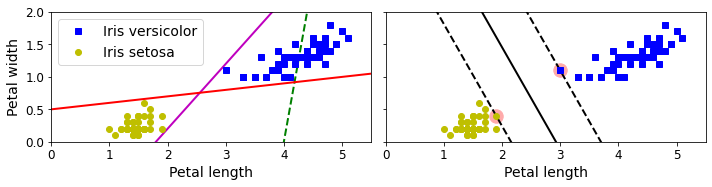

In [14]:
# Malos modelos 
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

In [15]:
svs = svm_clf.support_vectors_
svs 

array([[1.9, 0.4],
       [3. , 1.1]])

# Sensibilidad de las máquinas de soporte vectorial ante el escalado de atributos

In [6]:
# extra code – this cell generates and saves Figure 5–2
import numpy as np 
from sklearn.preprocessing import StandardScaler


In [7]:

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64) # creando unos atributos artificiales 
Xs

array([[ 1., 50.],
       [ 5., 20.],
       [ 3., 80.],
       [ 5., 60.]])

In [8]:
ys = np.array([0, 0, 1, 1]) # creó las etiquetas artificiales 
ys

array([0, 0, 1, 1])

In [9]:

%%time 
from sklearn.svm import SVC 
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)


CPU times: user 60.6 ms, sys: 32.3 ms, total: 93 ms
Wall time: 125 ms


In [10]:

scaler = StandardScaler() # esta instanciando la clase StandardScaler
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)


In [23]:
X_scaled

array([[-1.50755672, -0.11547005],
       [ 0.90453403, -1.5011107 ],
       [-0.30151134,  1.27017059],
       [ 0.90453403,  0.34641016]])

In [11]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]  # parámetros del modelo 
    b = svm_clf.intercept_[0] # término de sesgo

    # At the decision boundary, w0*x0 + w1*x1 + b = 0 Esta es la ecuación cartesiana del modelo 
    # => x1 = -w0/w1 * x0 - b/w1   analogo a la forma general y = mx + b
    x0 = np.linspace(xmin, xmax, 2) # toma una partición de 200 puntos 
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]  

    margin = 1/w[1] # calcula el ancho de la margen 
    gutter_up = decision_boundary + margin  # gutter: canal 
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')  # traza los vectores de soporte 
    plt.plot(x0, decision_boundary, "k-", linewidth=2)  # grafica a la frontera de decisión 
    plt.plot(x0, gutter_up, "k--", linewidth=2)     # recta superior que pasa por uno de los vectores de soporte
    plt.plot(x0, gutter_down, "k--", linewidth=2)   # retca inferior que pasa por el otro vector de soporte. 

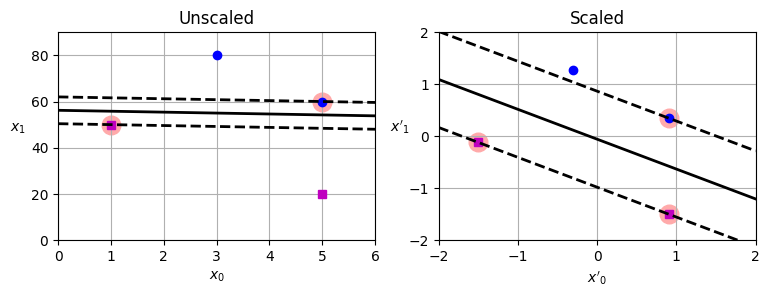

In [12]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(9, 2.7)) # crea el lienzo 

plt.subplot(121)  # empieza a dibujar el primer clasificador
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90])
plt.grid()


plt.subplot(122) # graficar el modelo para atributos escalados 
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2])
plt.grid()

plt.savefig("/home/marco/Documentos/investigacion/didactica_ciencia_datos/4_images/images_of_referents/geron/5_chapter/sensitivity_to_feature_scales_plot.jpg")
plt.show()

# [Soft Margin Classification](https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb)

## Referentes

* Cuaderno de Geron en GitHub sobre Máquinas de soporte vectorial SVM. Capítulo 5: https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb